In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the data from sheet1

MHealth = pd.read_csv(r"C:\Users\manso\Downloads\letter-recognition2.csv", header=0)

# Copy 20% data (stratified split on target variable) to new dataset 

MHealth = MHealth.groupby('letter', group_keys=False).apply(lambda x: x.sample(frac=0.2))

# Display the shape

MHealth.shape

(4002, 17)

In [3]:
# Re set the index

MHealth = MHealth.reset_index(drop=True)

# Copy to back-up file

MHealth_bk = MHealth.copy()

# display information of the dataset

MHealth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4002 entries, 0 to 4001
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  4002 non-null   object
 1   xbox    4002 non-null   int64 
 2   ybox    4002 non-null   int64 
 3   width   4002 non-null   int64 
 4   height  4002 non-null   int64 
 5   onpix   4002 non-null   int64 
 6   xbar    4002 non-null   int64 
 7   ybar    4002 non-null   int64 
 8   x2bar   4002 non-null   int64 
 9   y2bar   4002 non-null   int64 
 10  xybar   4002 non-null   int64 
 11  x2ybar  4002 non-null   int64 
 12  xy2bar  4002 non-null   int64 
 13  xedge   4002 non-null   int64 
 14  xedgey  4002 non-null   int64 
 15  yedge   4002 non-null   int64 
 16  yedgex  4002 non-null   int64 
dtypes: int64(16), object(1)
memory usage: 531.6+ KB


In [4]:
# Identify the missing values

MHealth.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [5]:
# Display Unique values of variables

MHealth.nunique()

letter    26
xbox      15
ybox      16
width     16
height    14
onpix     14
xbar      16
ybar      16
x2bar     16
y2bar     16
xybar     16
x2ybar    16
xy2bar    15
xedge     15
xedgey    14
yedge     15
yedgex    15
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in MHealth.columns:
    if MHealth[col].dtypes == 'object':
        MHealth[col] = le.fit_transform(MHealth[col])

In [7]:
# Identify the Independent and Target variables

IndepVar = []
for col in MHealth.columns:
    if col != 'letter':
        IndepVar.append(col)

TargetVar = 'letter'

x = MHealth[IndepVar]
y = MHealth[TargetVar]

In [8]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Multinomial Logistic Regression

In [9]:
# To build the 'Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression

# Create an object for model

MHealthLR = LogisticRegression(multi_class='multinomial', penalty='none', solver='newton-cg', random_state=42)

# Train the model with training data

MHealthLR = MHealthLR.fit(x_train,y_train)

In [10]:
# To display the algorithm paramaters

params = MHealthLR.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 42, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [11]:
# Predict the model with test data set

y_pred = MHealthLR.predict(x_test)

In [12]:
# Display confusion matrix and classifiction report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[43  0  0  0  0  0  0  0  0  2  0  0  0  0  1  0  0  0  0  1  0  0  1  0
   0  1]
 [ 0 41  0  2  0  0  1  3  2  0  0  0  0  0  1  1  1  3  6  0  0  1  0  0
   0  0]
 [ 0  0 33  1  0  0  2  0  0  0  6  1  0  0  0  0  0  0  0  1  0  0  0  0
   0  0]
 [ 0  3  0 38  0  0  0  1  1  0  2  0  0  1  1  1  0  0  1  1  0  0  0  2
   0  0]
 [ 0  0  0  0 31  0  3  1  0  0  2  1  0  0  0  0  1  0  1  0  0  0  0  0
   0  1]
 [ 0  0  0  2  2 38  0  1  0  0  0  0  0  0  0  4  0  1  2  0  0  0  0  0
   0  1]
 [ 1  0  4  0  0  0 23  3  0  0  3  1  0  0  0  1  8  1  1  0  0  0  1  0
   0  0]
 [ 0  0  0  2  0  2  1 20  0  0  3  0  1  4  4  0  1  5  0  0  4  0  0  0
   0  0]
 [ 0  0  0  1  0  2  0  0 34  1  0  0  0  0  0  0  0  0  1  0  0  0  0  1
   0  1]
 [ 0  0  0  1  0  0  0  0  2 37  0  0  0  0  0  0  0  1  1  0  0  0  0  1
   0  1]
 [ 0  1  2  0  2  0  0  0  0  0 28  3  0  0  0  0  0  6  0  0  2  0  0  1
   0  0]
 [ 1  0  0  0  2  0  2  0  0  0  0 35  0  0  1  0  1  0  0  2  0  0  0  2
   0  0]
 [ 0

# Multinominal Logistic Regression

[[43  0  0  0  0  0  1  0  0  0  0  1  0  0  0  0  0  1  1  0  0  0  0  0
   0  0]
 [ 0 41  0  3  0  0  0  0  0  0  1  0  0  0  0  0  0  2  4  0  0  1  0  0
   0  0]
 [ 0  0 33  0  0  0  4  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  2  1 38  0  2  0  2  1  1  0  0  1  1  0  0  0  2  1  0  1  0  0  0
   1  0]
 [ 0  0  0  0 31  2  0  0  0  0  2  2  0  0  0  0  1  0  1  1  0  0  0  1
   0  1]
 [ 0  0  0  0  0 38  0  2  2  0  0  0  0  0  0  5  0  0  1  0  0  0  0  0
   1  0]
 [ 0  1  2  0  3  0 23  1  0  0  0  2  0  0  0  1  1  0  0  0  0  0  0  0
   0  0]
 [ 0  3  0  1  1  1  3 20  0  0  0  0  0  2  9  0  0  0  0  1  1  0  1  0
   0  0]
 [ 0  2  0  1  0  0  0  0 34  2  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0  0]
 [ 2  0  0  0  0  0  0  0  1 37  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  5]
 [ 0  0  6  2  2  0  3  3  0  0 28  0  0  0  0  0  0  2  0  0  0  0  0  1
   0  0]
 [ 0  0  1  0  1  0  1  0  0  0  3 35  0  0  0  0  1  0  2  0  0  0  0  0
   0  1]
 [ 0

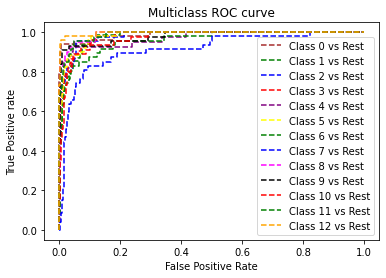

In [13]:
# To build the 'Multinominal Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression

# Create an object for model

MHealthLR = LogisticRegression(multi_class='multinomial', penalty='none', solver='newton-cg', random_state=0)

# Train the model with training data

MHealthLR = MHealthLR.fit(x_train,y_train)

# Predict the model with test data set

y_pred = MHealthLR.predict(x_test)
y_pred_prob = MHealthLR.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-12

lst_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 13

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='green', label='Class 6 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='blue', label='Class 7 vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='magenta', label='Class 8 vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='black', label='Class 9 vs Rest')
plt.plot(fpr[10], tpr[10], linestyle='--',color='red', label='Class 10 vs Rest')
plt.plot(fpr[11], tpr[11], linestyle='--',color='green', label='Class 11 vs Rest')
plt.plot(fpr[12], tpr[12], linestyle='--',color='orange', label='Class 12 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))
#

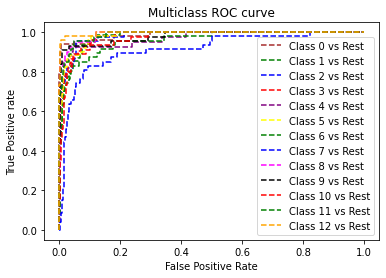

In [14]:
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 13

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='green', label='Class 6 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='blue', label='Class 7 vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='magenta', label='Class 8 vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='black', label='Class 9 vs Rest')
plt.plot(fpr[10], tpr[10], linestyle='--',color='red', label='Class 10 vs Rest')
plt.plot(fpr[11], tpr[11], linestyle='--',color='green', label='Class 11 vs Rest')
plt.plot(fpr[12], tpr[12], linestyle='--',color='orange', label='Class 12 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
#plt.savefig('Multiclass ROC',dpi=600);   

In [15]:
# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred_prob, multi_class='ovo', average='weighted'),3))

roc_auc_score: 0.979


In [16]:
# Results

pd.set_option("display.max_rows", None)

PredResults = pd.DataFrame({'xegvy correlation of x-ege with y':lst_actual_class, 'xegvy correlation of x-ege with y_Pred':lst_predicted_class})

# Merge two Dataframes on index of both the dataframes

TestDataResults = x_test.merge(PredResults, left_index=True, right_index=True)
TestDataResults.sample(10)

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,xegvy correlation of x-ege with y,xegvy correlation of x-ege with y_Pred
7,3,9,4,6,3,7,4,3,1,6,2,8,2,7,3,8,0,0
371,5,11,6,8,3,6,7,7,11,5,6,14,1,7,4,8,2,2
1320,2,5,3,4,1,7,7,0,8,13,6,8,0,8,1,8,8,8
2242,3,7,4,5,3,7,8,8,4,7,6,8,3,8,3,8,14,14
637,3,8,3,6,2,3,7,6,10,7,6,14,0,8,7,8,4,4
3098,4,7,5,5,2,8,4,14,5,6,14,8,3,9,0,8,20,20
1808,1,3,2,2,1,7,4,1,7,8,2,10,0,7,2,8,11,11
807,2,3,3,1,1,5,10,4,5,10,9,5,1,9,3,6,5,5
1361,1,3,2,2,1,7,8,1,7,13,6,8,0,8,1,7,8,8
3809,5,8,5,6,3,3,10,2,7,11,11,6,1,11,2,5,24,24
